# Laptop Price Prediction
## Regression Model




In [274]:
import pandas as pd
import numpy as np

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [276]:
file = "laptops.csv"
df= pd.read_csv(file)
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


## Exploratory Data Analysis

In [277]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [278]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [279]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [280]:
categories = list(df.dtypes[df.dtypes == 'object'].index)
categories

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [281]:
for col in categories :
    df[col]= df[col].str.replace(' ','_').str.lower()
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3060,17.3,no,2699.99
2156,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3070,17.3,no,2899.99
2157,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,32,1000,ssd,rtx_3080,17.3,no,3399.99
2158,razer_book_13_intel_evo_core_i7-1165g7/16gb/1t...,refurbished,razer,book,intel_evo_core_i7,16,1000,ssd,NaN,13.4,yes,1899.99


In [282]:
df.describe().round(2)

,ram,storage,screen,final_price
count,2160.00,2160.00,2156.00,2160.00
mean,15.41,596.29,15.17,1312.64
std,9.87,361.22,1.20,911.48
min,4.00,0.00,10.10,201.05
25%,8.00,256.00,14.00,661.08
50%,16.00,512.00,15.60,1031.95
75%,16.00,1000.00,15.60,1708.97
max,128.00,4000.00,18.00,7150.47


In [283]:
for col in df.columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique()[:10])
    print()

laptop
2160
['asus_expertbook_b1_b1502cba-ej0436x_intel_core_i5-1235u/8gb/512gb_ssd/15.6"'
 'alurin_go_start_intel_celeron_n4020/8gb/256gb_ssd/15.6"'
 'asus_expertbook_b1_b1502cba-ej0424x_intel_core_i3-1215u/8gb/256gb_ssd/15.6"'
 'msi_katana_gf66_12uc-082xes_intel_core_i7-12700h/16gb/1tb_ssd/rtx3050/15.6"'
 'hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb_ssd/15.6"'
 'msi_crosshair_17_c12vf-264xes_intel_core_i7-12650h/32gb/1tb_ssd/rtx_4060/17.3"'
 'lenovo_thinkpad_e14_gen_4_amd_ryzen_5_5625u/8gb/256gb_ssd/14"'
 'asus_vivobook_15_f515ja-ej2882w_intel_core_i7-1065g7/8gb/512gb_ssd/15.6"'
 'medion_akoya_e15415_intel_core_i5-10210u/8gb/256gb_ssd/15.6"'
 'hp_victus_16-d1038ns_intel_core_i7-12700h/16gb/512gb_ssd/rtx_3050/16.1"']

status
2
['new' 'refurbished']

brand
27
['asus' 'alurin' 'msi' 'hp' 'lenovo' 'medion' 'acer' 'apple' 'razer'
 'gigabyte']

model
121
['expertbook' 'go' 'katana' '15s' 'crosshair' 'thinkpad' 'vivobook'
 'akoya' 'victus' 'v15']

cpu
28
['intel_core_i5' 'intel_celeron' 

In [284]:
df.isnull().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

#### Handling the nan values in storage_type column

In [285]:
df.storage_type.mode()[0]

'ssd'

In [286]:
len(df[df.storage_type == 'emmc'])


56

In [287]:
# filling the nan values in the 'storage_type' column with the mode
df.storage_type = df.storage_type.fillna(df.storage_type.mode()[0])
df.storage_type.unique()

array(['ssd', 'emmc'], dtype=object)

#### Visualizing price distribution by GPU


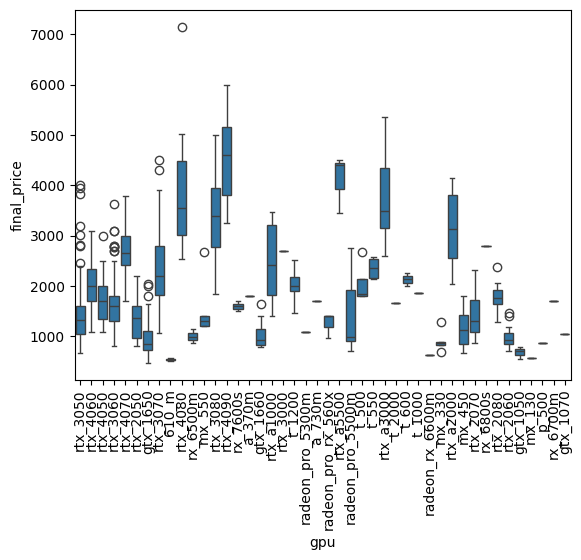

In [288]:
# Box plot to see price distribution by GPU
sns.boxplot(x='gpu', y='final_price', data=df )
plt.xticks(rotation=90)  
plt.show()


In [378]:
df.gpu.mode()[0]

'rtx_3050'

#### Handling the nan values in screen column

In [379]:
df.screen.isna().sum()

0

In [292]:
df.screen.mode()

0    15.6
Name: screen, dtype: float64

In [293]:
len(df[df.screen == 15.6])


1009

In [294]:
# filling the nan values with the mode
df.screen = df.screen.fillna(df.screen.mode()[0])
df.screen.unique()

array([15.6 , 17.3 , 14.  , 16.1 , 13.3 , 16.  , 13.6 , 17.  , 15.3 ,
       14.5 , 13.4 , 14.2 , 18.  , 14.1 , 12.4 , 13.5 , 16.2 , 15.  ,
       11.6 , 13.  , 10.5 , 14.4 , 12.3 , 15.4 , 12.5 , 10.1 , 10.95,
       12.  , 13.9 ])

In [295]:
df.ram.mean()

15.41388888888889

#### Handling 0 storage values

In [296]:
df.storage.unique()

array([ 512,  256, 1000,   64,  128,   32,    0, 2000,  500, 4000, 3000,
        240], dtype=int64)

In [297]:
len(df[df.storage == 0] )


1

In [298]:
storage_mean_with_0s = df.storage.mean()
print(storage_mean_with_0s)

storage_mean = df[df.storage!=0].storage.mean()
print(storage_mean)

596.2944444444445
596.5706345530338


In [299]:
# Calculate the mean for storage and replace 0 with it
df.storage = df.storage.replace(0, int(storage_mean))
df.storage.unique()

array([ 512,  256, 1000,   64,  128,   32,  596, 2000,  500, 4000, 3000,
        240], dtype=int64)

In [300]:
df.storage.unique()

array([ 512,  256, 1000,   64,  128,   32,  596, 2000,  500, 4000, 3000,
        240], dtype=int64)

In [301]:
df.describe().round(2)

,ram,storage,screen,final_price
count,2160.00,2160.00,2160.00,2160.00
mean,15.41,596.57,15.17,1312.64
std,9.87,360.99,1.20,911.48
min,4.00,32.00,10.10,201.05
25%,8.00,256.00,14.00,661.08
50%,16.00,512.00,15.60,1031.95
75%,16.00,1000.00,15.60,1708.97
max,128.00,4000.00,18.00,7150.47


<Axes: xlabel='final_price', ylabel='Count'>

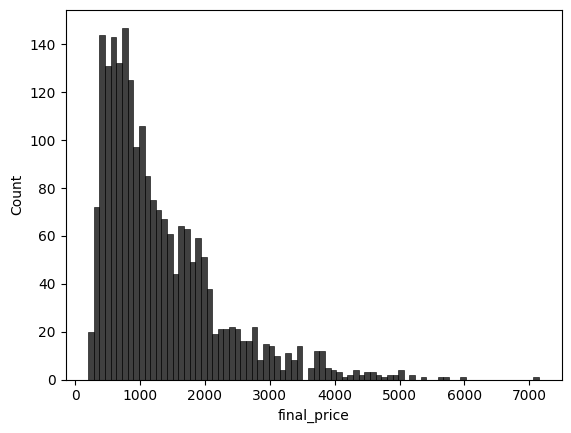

In [302]:
sns.histplot(df.final_price, bins=80, color='black')

In [303]:
# long tail, apply log to obtaian a Guassian distribution
price_logs= np.log1p(df.final_price)
price_logs

0       6.917706
1       5.703782
2       6.672033
3       7.090077
4       6.507293
          ...   
2155    7.901374
2156    7.972807
2157    8.131822
2158    7.550130
2159    7.438966
Name: final_price, Length: 2160, dtype: float64

<Axes: xlabel='final_price', ylabel='Count'>

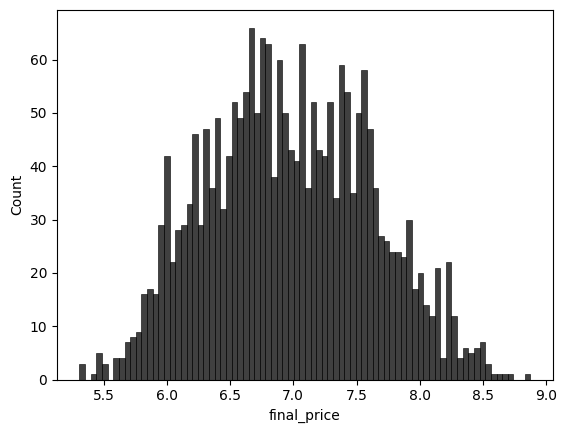

In [304]:
sns.histplot(price_logs, bins=80, color='black')


#### Split the data into training, validation and testing

In [305]:
n= len(df)
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)

n_train = n - n_val - n_test
n_train, n_val, n_test, n, n_train+ n_val+ n_test == n

(1296, 432, 432, 2160, True)

In [306]:
df_train = df.iloc[:n_train ]
df_val = df.iloc[n_train : n_train+n_val]
df_test = df.iloc[n_val+n_train :]


In [307]:
# Shuffle the data
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [308]:
df_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,acer_extensa_15_ex215-53g-56mt_intel_core_i5-1...,new,acer,extensa,intel_core_i5,8,256,ssd,mx_330,15.6,no,689.08
1292,acer_extensa_15_ex215-54-34hr_intel_core_i3-11...,new,acer,extensa,intel_core_i3,8,256,ssd,NaN,15.6,no,481.60
1293,acer_extensa_15_ex215-54-50uv_intel_core_i5-11...,new,acer,extensa,intel_core_i5,8,512,ssd,NaN,15.6,no,541.55
1294,acer_travelmate_p2_intel_core_i5-1135g7/8gb/51...,new,acer,travelmate,intel_core_i5,8,512,ssd,NaN,14.0,no,803.61


In [309]:
idx[n_train : ]

array([ 132,   80, 1706, 1769,  541, 1829,  983,  165,  248,  446, 1314,
        858, 1385,   97,  805,  737, 1480,  102,  434,   74,  577, 1809,
       1437, 1230,  918, 1963, 1915, 1857,  762,  989,  388,  235, 1732,
        267, 1329, 1356,  117, 2016,  673,  249, 1668, 2156,   94,   33,
       1680, 1912,  448,  716, 1447, 1746,    0, 1577, 1101, 1108, 1401,
         82, 1474,  676, 1666, 1046,  770, 1389, 1466, 1814, 1712,  404,
       1980, 1487, 1822,  104,  688, 1891,  826, 1240,   62, 1305,  852,
       1551, 1262,  223,  145, 1088,  373, 1958, 1142, 2071, 1718, 1274,
       1265, 1836, 1453,    9,  449,  708,  255,  882,  389, 1831,  908,
        924, 1953, 1542,  460, 1452, 1950, 1168,  958,  501,  739,   40,
        868,  731,  539, 1201, 1339,  697, 1599, 1610, 2039, 1145, 1031,
        372,  667, 1754,  357,  967,  783,  735, 1353, 1035,  970, 1753,
       1710, 2025, 1815, 1752, 1328, 1564, 1714, 1425, 1882, 1252, 1942,
       1967, 1236,  885,   79, 1172,  814, 1471,  6

In [310]:
df_train = df.iloc[idx[: n_train  ]]
df_val = df.iloc[idx[n_train : n_train+n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [311]:
df_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2079,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no,1123.29
668,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,NaN,14.1,no,201.05
2073,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no,997.74
1113,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,NaN,13.3,no,1016.00
788,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no,2739.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1777,asus_p1411cja-bv377r_intel_core_i5-1035g1/8gb/...,refurbished,asus,p1411,intel_core_i5,8,256,ssd,NaN,14.0,no,549.00
183,msi_prestige_16_studio_a13ve-045xes_intel_core...,new,msi,prestige,intel_core_i7,32,1000,ssd,rtx_4050,16.0,no,1999.00
137,lenovo_ideapad_gaming_3_15iah7_intel_core_i5-1...,new,lenovo,ideapad,intel_core_i5,16,512,ssd,rtx_3050,15.6,no,1059.00
899,lenovo_yoga_7_14itl5_intel_evo_core_i7-1165g7/...,new,lenovo,yoga,intel_evo_core_i7,16,512,ssd,NaN,14.0,yes,1671.00


In [312]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [313]:
df_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no,1123.29
1,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,NaN,14.1,no,201.05
2,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no,997.74
3,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,NaN,13.3,no,1016.00
4,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no,2739.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,asus_p1411cja-bv377r_intel_core_i5-1035g1/8gb/...,refurbished,asus,p1411,intel_core_i5,8,256,ssd,NaN,14.0,no,549.00
1292,msi_prestige_16_studio_a13ve-045xes_intel_core...,new,msi,prestige,intel_core_i7,32,1000,ssd,rtx_4050,16.0,no,1999.00
1293,lenovo_ideapad_gaming_3_15iah7_intel_core_i5-1...,new,lenovo,ideapad,intel_core_i5,16,512,ssd,rtx_3050,15.6,no,1059.00
1294,lenovo_yoga_7_14itl5_intel_evo_core_i7-1165g7/...,new,lenovo,yoga,intel_evo_core_i7,16,512,ssd,NaN,14.0,yes,1671.00


In [314]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [316]:
df_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,msi_modern_15_a11sbu-620xes_intel_core_i7-1165...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,15.6,no,1123.29
1,thomson_neo_white_intel_celeron_n4020/4gb/64gb...,new,thomson,neo,intel_celeron,4,64,emmc,NaN,14.1,no,201.05
2,msi_modern_14_b11sb-420xes_intel_core_i7-1165g...,refurbished,msi,modern,intel_core_i7,32,1000,ssd,mx_450,14.0,no,997.74
3,asus_zenbook_13_oled_ux325ea_intel_evo_core_i7...,new,asus,zenbook,intel_evo_core_i7,16,512,ssd,NaN,13.3,no,1016.00
4,acer_predator_triton_500_se_pt516-51s-75k6_int...,new,acer,predator,intel_core_i7,32,1000,ssd,rtx_3080,16.0,no,2739.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,asus_p1411cja-bv377r_intel_core_i5-1035g1/8gb/...,refurbished,asus,p1411,intel_core_i5,8,256,ssd,NaN,14.0,no,549.00
1292,msi_prestige_16_studio_a13ve-045xes_intel_core...,new,msi,prestige,intel_core_i7,32,1000,ssd,rtx_4050,16.0,no,1999.00
1293,lenovo_ideapad_gaming_3_15iah7_intel_core_i5-1...,new,lenovo,ideapad,intel_core_i5,16,512,ssd,rtx_3050,15.6,no,1059.00
1294,lenovo_yoga_7_14itl5_intel_evo_core_i7-1165g7/...,new,lenovo,yoga,intel_evo_core_i7,16,512,ssd,NaN,14.0,yes,1671.00


## Linear Regression

In [317]:
# let's look at one of the rows of the training data subset
df_train.iloc[10]

laptop          lenovo_v15_g2_itl_intel_core_i7-1165g7/16gb/51...
status                                                        new
brand                                                      lenovo
model                                                         v15
cpu                                                 intel_core_i7
ram                                                            16
storage                                                       512
storage_type                                                  ssd
gpu                                                           NaN
screen                                                       15.6
touch                                                          no
final_price                                                 969.0
Name: 10, dtype: object

The linear regression algorithm is as follows :
g(x<sub>i </sub>) = w<sub>o</sub> + sum (x<sub>ij</sub>* w<sub>j</sub>)
<br>
g(x<sub>i</sub> )=  w<sub>o</sub> + x<sub>i</sub><sup>T</sup>. w <br>
To find w :<br> 
y= X. w <br> 
y. X<sup>-1</sup > =X<sup>-1</sup >. X. w <br> 
But X matrices aren't square, so X<sup>-1</sup > doesn't exist. To make the matrix square, we can multiply it by its transpose; X<sup>T</sup >. X is square. <br>It's called the gram matrix, and its inverse exists. <br>
This method is to find an approximate w. So:<br>
X<sup>T</sup >. X . w = X<sup>T</sup >.y <br>
(X<sup>T</sup >. X )<sup>-1</sup>.X<sup>T</sup >. X . w = (X<sup>T</sup >. X )<sup>-1</sup>.X<sup>T</sup >.y <br>
I. w = (X<sup>T</sup >. X )<sup>-1</sup>.X<sup>T</sup >.y <br>
w = (X<sup>T</sup >. X )<sup>-1</sup>.X<sup>T</sup >.y <br>






In [318]:
# the goal is to calculate the w matrix
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    # add ones for the bias term, w0.1 = w0
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]
    

In [319]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [320]:
features = ['ram', 'storage', 'screen']

In [321]:
df_train[features]

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0
...,...,...,...
1291,8,256,14.0
1292,32,1000,16.0
1293,16,512,15.6
1294,16,512,14.0


In [322]:
X_train = df_train[features].values
w0, w = train_linear_regression(X_train, y_train) 
w0, w

(6.8526250841802, array([ 0.02649985,  0.00066615, -0.04513269]))

In [323]:
y_pred = w0 + X_train.dot(w)
y_pred

array([7.66269864, 6.36488708, 7.73491094, ..., 6.91362068, 6.98583298,
       6.98583298])

#### Validating the model

<Axes: ylabel='Count'>

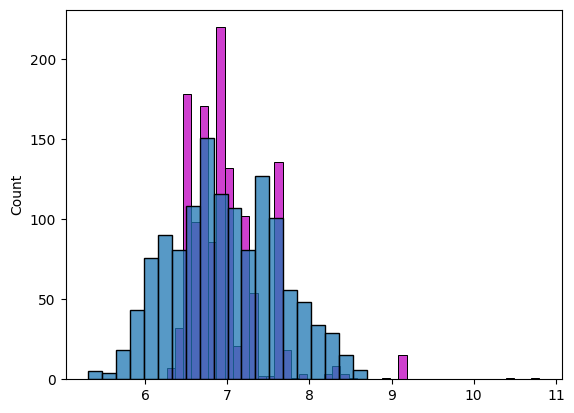

In [324]:
sns.histplot(y_pred, color ='m')
sns.histplot(y_train)

In [325]:
def rmse(y, y_pred):
    se = (y- y_pred) **2
    mse = se.mean()
    return np.sqrt(mse)

In [326]:
rmse(y_train, y_pred)

0.4461104475308585

### Using categorical variables to enhance the model

In [327]:
df.dtypes == object

laptop           True
status           True
brand            True
model            True
cpu              True
ram             False
storage         False
storage_type     True
gpu              True
screen          False
touch            True
final_price     False
dtype: bool

In [328]:
categories = list(df.dtypes[df.dtypes == 'object'].index)
categories

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [329]:
# i will only select some categories that i think are relevant

In [330]:
categories = ['status', 'storage_type','touch']

#### Encoding categorical variables
Using one-hot encoding, where we create a separate column for each value for each column

In [331]:
for cat in categories:
    print(cat, df[cat].unique(), " \n" )

status ['new' 'refurbished']  

storage_type ['ssd' 'emmc']  

touch ['no' 'yes']  



In [332]:
df['status_new'] = (df.status == 'new').astype(int)
categories.append('status_new')

df['status_refurbished'] = (df.status == 'refurbished').astype(int)
categories.append('status_refurbished')

categories.remove('status')
categories


['storage_type', 'touch', 'status_new', 'status_refurbished']

In [333]:
df['status_refurbished'].unique()

array([0, 1])

In [334]:
df['touch_yes'] = (df.touch == 'yes').astype(int)
categories.append('touch_yes')

df['touch_no'] = (df.touch == 'no').astype(int)
categories.append('touch_no')

categories.remove('touch')
categories


['storage_type', 'status_new', 'status_refurbished', 'touch_yes', 'touch_no']

In [335]:
df['touch_no'].unique()

array([1, 0])

In [336]:
df['storage_type_ssd'] = (df.storage_type == 'ssd').astype(int)
categories.append('storage_type_ssd')

df['storage_type_emmc'] = (df.storage_type == 'emmc').astype(int)
categories.append('storage_type_emmc')

categories.remove('storage_type')
categories


['status_new',
 'status_refurbished',
 'touch_yes',
 'touch_no',
 'storage_type_ssd',
 'storage_type_emmc']

In [337]:
df['storage_type_emmc'].unique()

array([0, 1])

In [338]:
categories

['status_new',
 'status_refurbished',
 'touch_yes',
 'touch_no',
 'storage_type_ssd',
 'storage_type_emmc']

In [339]:
full_features =  features + categories 
full_features

['ram',
 'storage',
 'screen',
 'status_new',
 'status_refurbished',
 'touch_yes',
 'touch_no',
 'storage_type_ssd',
 'storage_type_emmc']

In [340]:
df.touch_no

0       1
1       1
2       1
3       1
4       1
       ..
2155    1
2156    1
2157    1
2158    0
2159    0
Name: touch_no, Length: 2160, dtype: int32

In [341]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price,status_new,status_refurbished,touch_yes,touch_no,storage_type_ssd,storage_type_emmc
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00,1,0,0,1,1,0
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00,1,0,0,1,1,0
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00,1,0,0,1,1,0
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00,1,0,0,1,1,0
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3060,17.3,no,2699.99,0,1,0,1,1,0
2156,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3070,17.3,no,2899.99,0,1,0,1,1,0
2157,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,32,1000,ssd,rtx_3080,17.3,no,3399.99,0,1,0,1,1,0
2158,razer_book_13_intel_evo_core_i7-1165g7/16gb/1t...,refurbished,razer,book,intel_evo_core_i7,16,1000,ssd,NaN,13.4,yes,1899.99,0,1,1,0,1,0


In [342]:
df[full_features]

,ram,storage,screen,status_new,status_refurbished,touch_yes,touch_no,storage_type_ssd,storage_type_emmc
0,8,512,15.6,1,0,0,1,1,0
1,8,256,15.6,1,0,0,1,1,0
2,8,256,15.6,1,0,0,1,1,0
3,16,1000,15.6,1,0,0,1,1,0
4,16,512,15.6,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
2155,16,1000,17.3,0,1,0,1,1,0
2156,16,1000,17.3,0,1,0,1,1,0
2157,32,1000,17.3,0,1,0,1,1,0
2158,16,1000,13.4,0,1,1,0,1,0


In [343]:
# i noticed that the features ram,storage and screen have different ranges than the rest of the features 0-1, which 
# gives them 10x-100x more importance, so i will scale them 

In [344]:
def min_max_scale(df, features):
    df_scaled = df[full_features].copy()  

    for f in features:
        min_val = df_scaled[f].min()
        max_val = df_scaled[f].max()
        
        df_scaled[f] = (df_scaled[f] - min_val) / (max_val - min_val)
    
    return df_scaled


In [345]:
min_max_scale(df,features)

,ram,storage,screen,status_new,status_refurbished,touch_yes,touch_no,storage_type_ssd,storage_type_emmc
0,0.032258,0.120968,0.696203,1,0,0,1,1,0
1,0.032258,0.056452,0.696203,1,0,0,1,1,0
2,0.032258,0.056452,0.696203,1,0,0,1,1,0
3,0.096774,0.243952,0.696203,1,0,0,1,1,0
4,0.096774,0.120968,0.696203,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
2155,0.096774,0.243952,0.911392,0,1,0,1,1,0
2156,0.096774,0.243952,0.911392,0,1,0,1,1,0
2157,0.225806,0.243952,0.911392,0,1,0,1,1,0
2158,0.096774,0.243952,0.417722,0,1,1,0,1,0


In [346]:
df[full_features]=min_max_scale(df,features)

In [347]:
df_train = df[full_features].iloc[idx[: n_train  ]]
df_val = df[full_features].iloc[idx[n_train : n_train+n_val]]
df_test = df[full_features].iloc[idx[n_train + n_val:]]

In [349]:
X_train = df_train.values

w0,w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

print(y_train, y_pred)
rmse(y_train, y_pred).round(3)

[7.024907   5.30851519 6.90649448 ... 6.96602419 7.42177579 6.96318999] [14.5   8.    4.25 ... 15.   19.75  4.75]


9.515

#### Regularization
Adding a small number r to the diagonal to obtain better results.

In [350]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX += r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]
    
    

In [351]:
X_train = df_train.values

w0,w = train_linear_regression_reg(X_train, y_train)
y_pred = w0 + X_train.dot(w)

rmse(y_train, y_pred).round(3)

0.424

#### Tuning
Finding the best r

In [352]:
scores =[]

for r in [0.0, 0.001, 0.01, 0.1, 1, 10, 100] :
    w0,w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = df_val[full_features].values
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred).round(5)
    print(f"r={r}, w0={w0}, score={score}")
    scores.append(score)

print(scores)
    
    

r=0.0, w0=1353237494006252.2, score=9.26924
r=0.001, w0=2.5095653077103277, score=0.41619
r=0.01, w0=2.5093205313539295, score=0.41623
r=0.1, w0=2.5068960108259546, score=0.41658
r=1, w0=2.4847033258929523, score=0.42065
r=10, w0=2.3608902034347015, score=0.46483
r=100, w0=2.089138619562477, score=0.60611
[9.26924, 0.41619, 0.41623, 0.41658, 0.42065, 0.46483, 0.60611]


In [354]:
# r=0.001 is the best

In [355]:
X_train = df_train.values

w0,w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w0 + X_train.dot(w)

rmse(y_train, y_pred).round(3)

0.424

#### Testing how the choice of seed affects the performance of the model

In [372]:
def split(df,idx):

    n_val = int(len(df) * 0.2)
    n_test = int(len(df) * 0.2)
    n_train = n - n_val - n_test

    df_train = df.iloc[idx[: n_train  ]]
    df_val = df.iloc[idx[n_train : n_train+n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)

    return df_train, df_val, df_test, y_train, y_val, y_test

    

def test_seeds(df):
    rmse_scores = []
    n=len(df)
    idx = np.arange(n)
    for x in range(10):
        np.random.seed(x)
        np.random.shuffle(idx)

        df_train, df_val, df_test, y_train, y_val, y_test = split(df,idx)
        df[full_features]=min_max_scale(df,features)
        X_train = df_train[full_features].values
        w0,w = train_linear_regression_reg(X_train, y_train, r=0.001) 
        print(f"x= {x}, w0= {w0.round(4)} , w={w.round(4)}")

        X_val = df_val[full_features].values
        y_pred = w0 + X_val.dot(w)

        rmse_score = rmse(y_val, y_pred).round(3)
        rmse_scores.append(rmse_score)
        print("rmse=",rmse_score)
        print()
    print(rmse_scores)
    print(np.std(rmse_scores).round(3))

        

test_seeds(df)

x= 0, w0= 2.4781 , w=[3.0947 2.8376 0.0034 1.297  1.1811 1.4265 1.0516 1.4578 1.0203]
rmse= 0.413

x= 1, w0= 2.4874 , w=[ 3.1177  2.6673 -0.0282  1.2912  1.1962  1.4221  1.0654  1.495   0.9925]
rmse= 0.416

x= 2, w0= 2.5191 , w=[ 3.2831  2.6729 -0.2115  1.3073  1.2118  1.4409  1.0782  1.5058  1.0133]
rmse= 0.44

x= 3, w0= 2.5072 , w=[ 3.0969  2.7241 -0.1499  1.3178  1.1895  1.4129  1.0943  1.5065  1.0008]
rmse= 0.412

x= 4, w0= 2.4907 , w=[ 3.591   2.775  -0.124   1.3049  1.1858  1.4243  1.0665  1.4729  1.0178]
rmse= 0.422

x= 5, w0= 2.4938 , w=[ 2.8808  2.7985 -0.0458  1.2953  1.1985  1.4337  1.0601  1.4858  1.0081]
rmse= 0.406

x= 6, w0= 2.5038 , w=[ 3.3556  2.5132 -0.1401  1.3076  1.1962  1.4286  1.0752  1.5163  0.9874]
rmse= 0.425

x= 7, w0= 2.49 , w=[ 2.7757  2.8688 -0.049   1.3031  1.1869  1.4171  1.0729  1.4884  1.0016]
rmse= 0.415

x= 8, w0= 2.5026 , w=[ 2.9829  3.2395 -0.1894  1.3053  1.1974  1.436   1.0666  1.4796  1.0231]
rmse= 0.434

x= 9, w0= 2.5015 , w=[ 3.2095  2.9509 -0

In [373]:
df_train[full_features].values

array([[0.03225806, 0.12096774, 0.49367089, ..., 1.        , 1.        ,
        0.        ],
       [0.09677419, 0.12096774, 0.69620253, ..., 1.        , 1.        ,
        0.        ],
       [0.09677419, 0.12096774, 0.69620253, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.03225806, 0.05645161, 0.40506329, ..., 0.        , 1.        ,
        0.        ],
       [0.22580645, 0.24395161, 0.69620253, ..., 1.        , 1.        ,
        0.        ],
       [0.03225806, 0.05645161, 0.40506329, ..., 1.        , 1.        ,
        0.        ]])

In [374]:
# we notice that x=5 is the best seed, with rmse=0.406

## Testing the model

In [381]:
# we will use a seed 5
n=len(df)
idx = np.arange(n)
np.random.seed(3)
np.random.shuffle(idx)

df_train, df_val, df_test, y_train, y_val, y_test = split(df,idx)
df_full_train = pd.concat([df_train,df_val])

df_full_train[full_features] = min_max_scale(df_full_train,features)
df_test[full_features] = min_max_scale(df_test,features)


# combine our datasets
X_full_train = df_full_train[full_features].values
y_full_train = np.concatenate([y_train, y_val])

w0,w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001) 
print(f"w0= {w0.round(4)} , w={w.round(4)}")

X_test = df_test[full_features].values
y_pred = w0 + X_test.dot(w)

rmse_score = rmse(y_test, y_pred).round(3)
print("rmse=",rmse_score)
print()


w0= 2.495 , w=[ 3.1998  2.6355 -0.0988  1.304   1.191   1.4151  1.0799  1.4903  1.0047]
rmse= 0.894



C:\Users\User\AppData\Local\Temp\ipykernel_8444\961232563.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[full_features] = min_max_scale(df_test,features)


In [ ]:
# combine our datasets
df_full_train = pd.concat([df_train,df_val])
df_full_train